In [5]:
library(CausalImpact)
library(ggplot2)
library(missForest)
library(zoo)

Loading required package: bsts

Loading required package: BoomSpikeSlab

Loading required package: Boom


Attaching package: ‘Boom’


The following object is masked from ‘package:stats’:

    rWishart



Attaching package: ‘BoomSpikeSlab’


The following object is masked from ‘package:stats’:

    knots


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: xts


Attaching package: ‘bsts’


The following object is masked from ‘package:BoomSpikeSlab’:

    SuggestBurn




In [7]:
require("reticulate")
source_python("pickle_reader.py")
ndvi_1994_mean <- read_pickle_file("../../working/ndvi_changed_mean_1994")

Posterior inference {CausalImpact}

                         Average            Cumulative      
Actual                   0.58               11.67           
Prediction (s.d.)        0.59 (0.0055)      11.82 (0.1097)  
95% CI                   [0.58, 0.6]        [11.60, 12.0]   
                                                            
Absolute effect (s.d.)   -0.0071 (0.0055)   -0.1424 (0.1097)
95% CI                   [-0.018, 0.0035]   [-0.361, 0.0706]
                                                            
Relative effect (s.d.)   -1.2% (0.92%)      -1.2% (0.92%)   
95% CI                   [-3%, 0.61%]       [-3%, 0.61%]    

Posterior tail-area probability p:   0.092
Posterior prob. of a causal effect:  91%

For more details, type: summary(impact, "report")

NULL


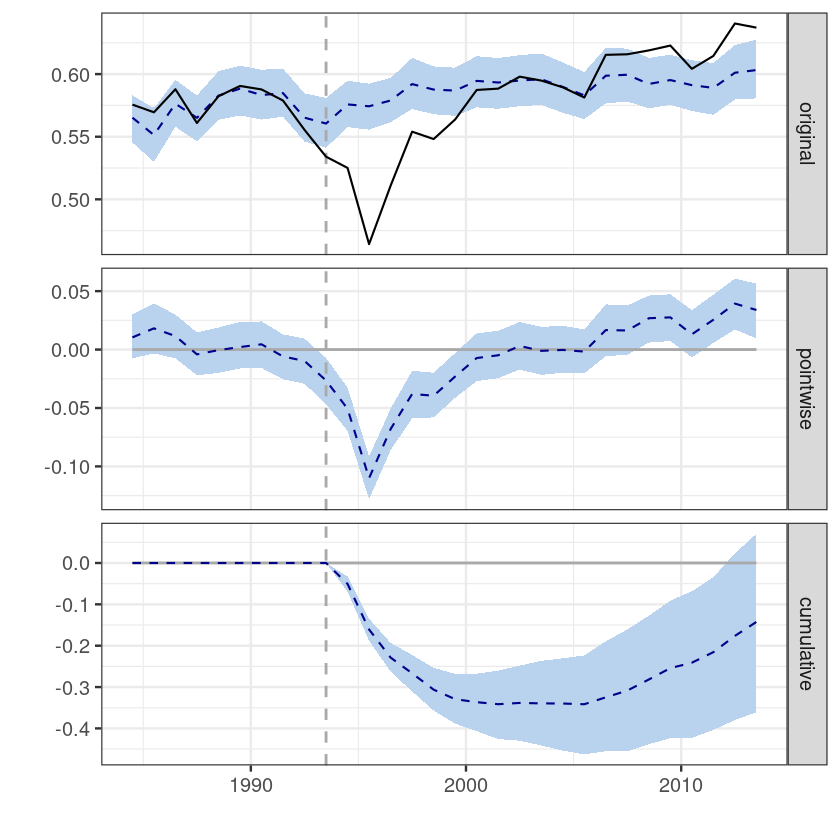

In [8]:
set.seed(15)
t <- seq.Date(as.Date("1984-07-01"), by = "years", length.out = 30)
data <- zoo(ndvi_1994_mean, t)
pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
post.period <- as.Date(c("1994-07-01", "2013-07-01"))
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)
print(summary(impact))

In [9]:
ndvi_1994_data <- read_pickle_file("../../working/ndvi_1994_data")

In [26]:
set.seed(123)
res=matrix(,nrow=length(ndvi_1994_data),ncol=5)
res2=matrix(,nrow=length(ndvi_1994_data),ncol=5)
y=matrix(NA,nrow=30,ncol=length(ndvi_1994_data))
X=matrix(NA,nrow=30,ncol=length(ndvi_1994_data))

for(k in 1:length(ndvi_1994_data)){
# for(k in 1:5){
    print(k)
    flush.console()
    tryCatch({
        data=ndvi_1994_data[k]
        data<-matrix(unlist(data),nrow=30)
        # all_columns_na <- apply(data, 1, function(row) all(is.na(row)))
        # t_na_rm = t[all_columns_na==FALSE]
        # data_na_rm = data[all_columns_na==FALSE,]
        imputed_data<-missForest(data)
        imputed_data<-imputed_data[1]$ximp

        # data_ts <- zoo(imputed_data, t)
        # ave = rowMeans(data_ts[,2:dim(data_ts)[2]],1)
        y[,k] <- imputed_data[,1]
        X[,k] = rowMeans(imputed_data[,2:dim(imputed_data)[2]],1)
        data_ts_ave = zoo(cbind(y[,k],X[,k]),t)
        pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
        post.period <- as.Date(c("1994-07-01", "2013-07-01"))
        impact <- CausalImpact(data_ts_ave, pre.period, post.period)
        # impact2 <- CausalImpact(data_ts, pre.period, post.period)

        res[k,1] = impact$summary$Actual[1]
        res[k,2] = impact$summary$Pred[1]
        res[k,3] = impact$summary$AbsEffect[1]
        res[k,4] = impact$summary$RelEffect[1]
        res[k,5] = impact$summary$p[1]},
        
    error=function(err){return(NA)})
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 204


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 205


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 206
[1] 207


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 208


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 209


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 210
[1] 211
[1] 212
[1] 213
[1] 214
[1] 215
[1] 216
[1] 217


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 218
[1] 219
[1] 220


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 221


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 222
[1] 223


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 224


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 225
[1] 226
[1] 227
[1] 228
[1] 229
[1] 230
[1] 231
[1] 232
[1] 233
[1] 234
[1] 235
[1] 236
[1] 237
[1] 238
[1] 239
[1] 240
[1] 241
[1] 242
[1] 243
[1] 244
[1] 245
[1] 246
[1] 247
[1] 248
[1] 249
[1] 250
[1] 251
[1] 252
[1] 253
[1] 254
[1] 255
[1] 256
[1] 257
[1] 258
[1] 259
[1] 260
[1] 261
[1] 262
[1] 263
[1] 264
[1] 265
[1] 266
[1] 267
[1] 268
[1] 269
[1] 270
[1] 271
[1] 272
[1] 273
[1] 274
[1] 275
[1] 276
[1] 277
[1] 278
[1] 279
[1] 280
[1] 281
[1] 282
[1] 283
[1] 284
[1] 285
[1] 286
[1] 287
[1] 288
[1] 289
[1] 290
[1] 291
[1] 292
[1] 293
[1] 294
[1] 295
[1] 296
[1] 297
[1] 298
[1] 299
[1] 300
[1] 301
[1] 302
[1] 303
[1] 304
[1] 305
[1] 306
[1] 307
[1] 308
[1] 309
[1] 310
[1] 311
[1] 312
[1] 313
[1] 314
[1] 315
[1] 316
[1] 317
[1] 318
[1] 319
[1] 320
[1] 321
[1] 322
[1] 323
[1] 324
[1] 325
[1] 326
[1] 327
[1] 328
[1] 329
[1] 330
[1] 331
[1] 332
[1] 333
[1] 334
[1] 335
[1] 336
[1] 337
[1] 338
[1] 339
[1] 340
[1] 341
[1] 342
[1] 343
[1] 344
[1] 345
[1] 346
[1] 347
[1] 348
[1] 349


Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 0.56. By contrast, in the absence of an intervention, we would have expected an average response of 0.59. The 95% interval of this counterfactual prediction is [0.58, 0.60]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is -0.030 with a 95% interval of [-0.039, -0.020]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 11.24. By contrast, had the intervention not taken place, we would have expected a sum of 11.83. The 95% interval of this prediction is [11.65, 12.02].

The above results are given in terms of absolute numbers. In relative terms, the response variable show

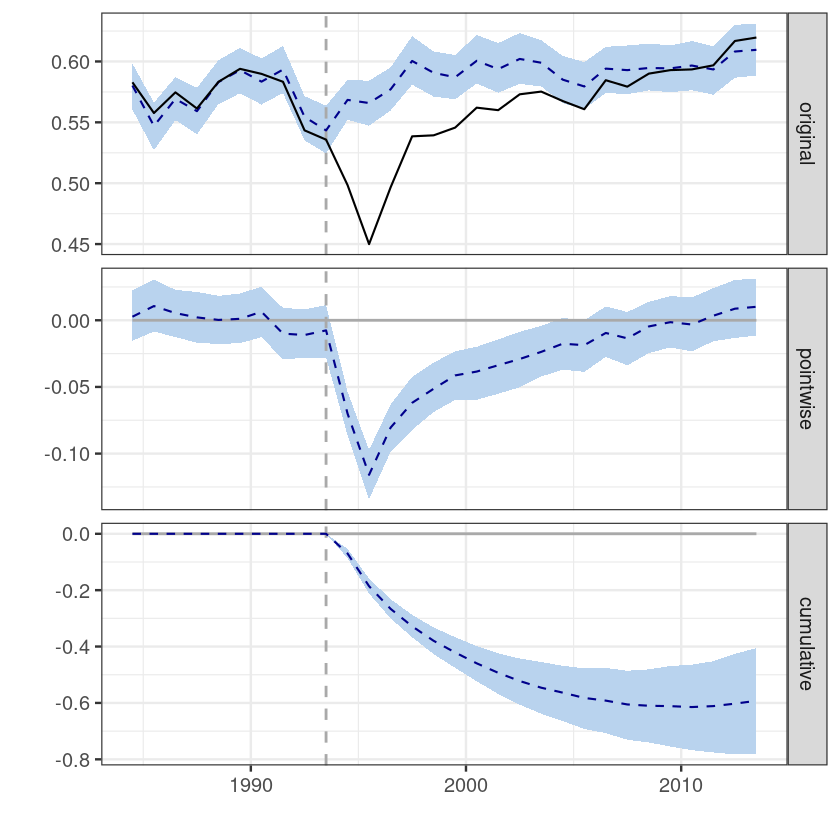

In [30]:
y_mean = rowMeans(y,na.rm=TRUE)
X_mean = rowMeans(X,na.rm=TRUE)
data_mean = zoo(cbind(y_mean,X_mean),t)
set.seed(1)
pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
post.period <- as.Date(c("1994-07-01", "2013-07-01"))
impact <- CausalImpact(data_mean, pre.period, post.period)
plot(impact)
print(summary(impact,"report"))

In [34]:
save(res, data_mean, file = "ci_results_data.RData")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 0.56. By contrast, in the absence of an intervention, we would have expected an average response of 0.59. The 95% interval of this counterfactual prediction is [0.58, 0.60]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is -0.030 with a 95% interval of [-0.039, -0.020]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 11.24. By contrast, had the intervention not taken place, we would have expected a sum of 11.83. The 95% interval of this prediction is [11.65, 12.02].

The above results are given in terms of absolute numbers. In relative terms, the response variable show

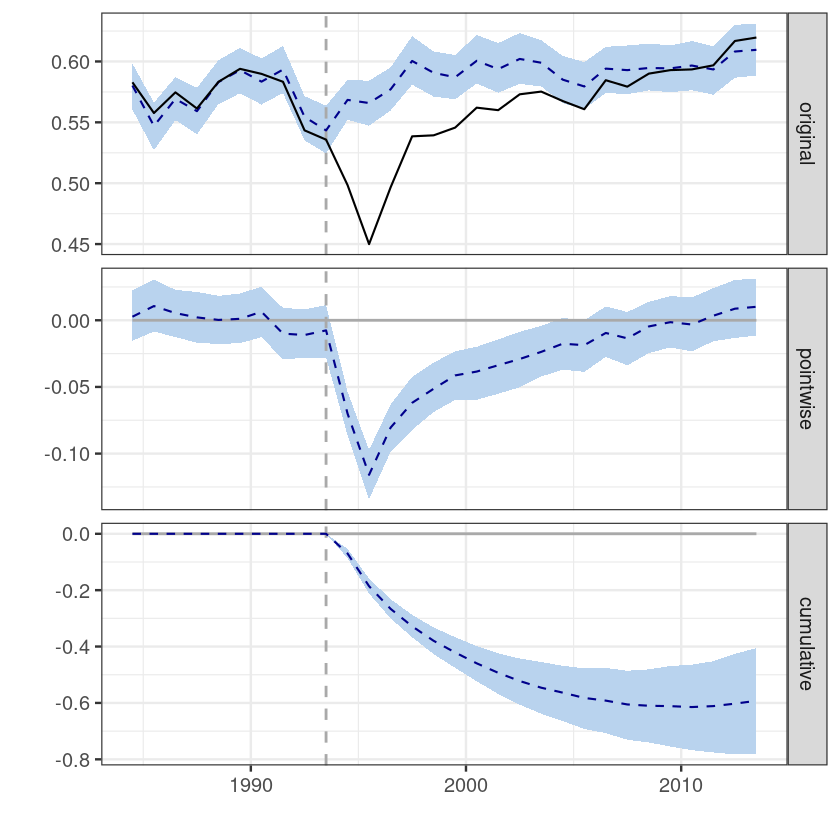

In [36]:
set.seed(1)
pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
post.period <- as.Date(c("1994-07-01", "2013-07-01"))
impact <- CausalImpact(data_mean, pre.period, post.period)
plot(impact)
print(summary(impact,"report"))

[1] NA

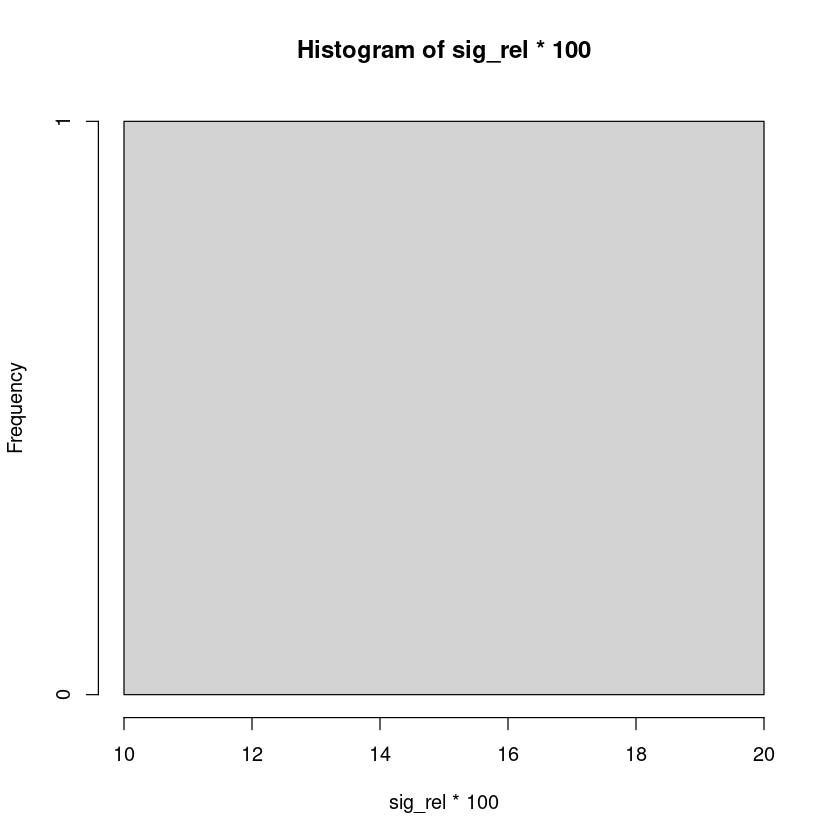

In [24]:
zscore <- function(data,std){
    (abs(data-mean(data))/sd(data))
}
res_na <- apply(res, 1, function(row) all(is.na(row)))
res_no_nan =res[res_na==FALSE,] 
sig = res_no_nan[,5]<0.01
sig_rel = res_no_nan[sig,4]
sig_rel_clean = sig_rel[(zscore(sig_rel)<3)]
sig_rel_clean
hist(sig_rel*100)

In [25]:
sig_rel

[1] 0.1816265